In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from sklearn.model_selection import train_test_split;

In [5]:
df = pd.read_csv('trainMissing.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
print(df.shape)
df.head()

(1460, 3)


,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [13]:
df.isnull().sum() , df.isnull().mean()*100

(FireplaceQu    690
 GarageQual      81
 SalePrice        0
 dtype: int64,
 FireplaceQu    47.260274
 GarageQual      5.547945
 SalePrice       0.000000
 dtype: float64)

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64


<Axes: xlabel='GarageQual'>

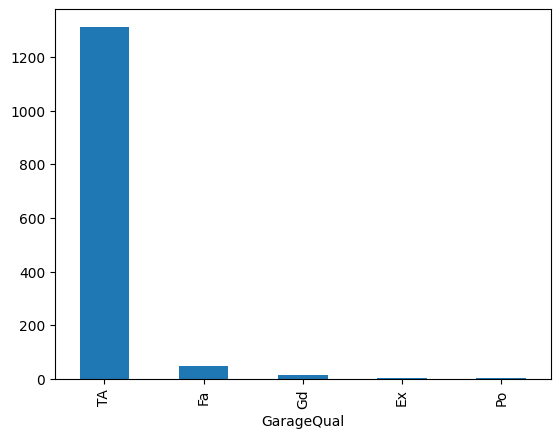

In [14]:
print(df.GarageQual.value_counts())
df.GarageQual.value_counts().plot.bar()

In [24]:
df.GarageQual.mode()

0    TA
Name: GarageQual, dtype: object

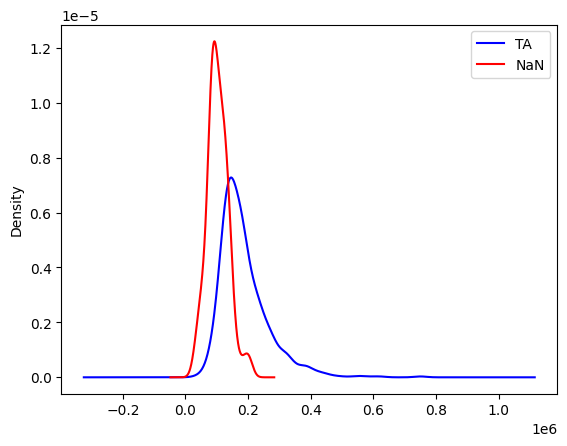

In [30]:
# plot for ta and na value comparison 
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde' , ax=ax , color='blue' , label='TA')
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde' , ax=ax , color='red' , label='NaN')
plt.legend()
plt.show()


In [32]:
temp = df[df['GarageQual']=='TA']['SalePrice']

In [33]:
df['GarageQual'].fillna('TA',inplace=True)

In [35]:
df.GarageQual.value_counts()

GarageQual
TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

Text(0.5, 1.0, 'GarageQual')

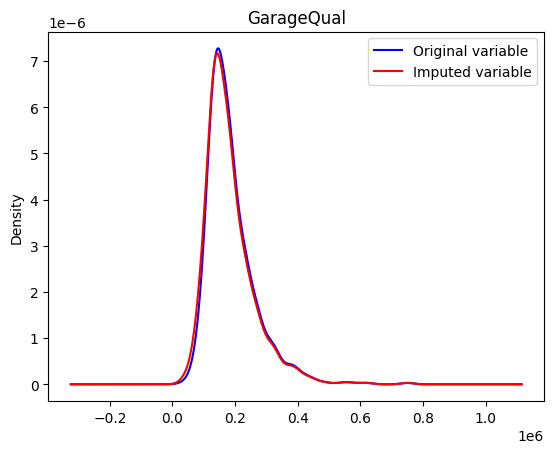

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde' , ax=ax , color='blue' , label='TA')
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')


FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64


<Axes: xlabel='FireplaceQu'>

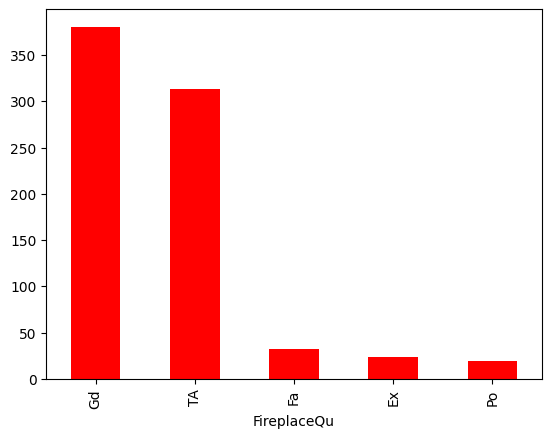

In [42]:
print(df.FireplaceQu.value_counts())
df.FireplaceQu.value_counts().plot(kind='bar' , color='red')

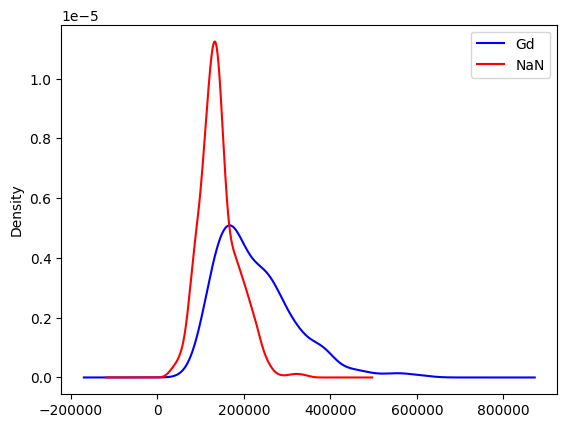

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df.FireplaceQu == 'Gd']['SalePrice'].plot(kind='kde' , ax=ax , color='blue' , label='Gd')
df[df.FireplaceQu.isnull()]['SalePrice'].plot(kind='kde' , ax=ax , color='red' , label='NaN')
plt.legend()
plt.show()

In [49]:
temp2 = df[df['FireplaceQu']=='Gd']['SalePrice']

In [50]:
df['FireplaceQu'].fillna('Gd',inplace=True)

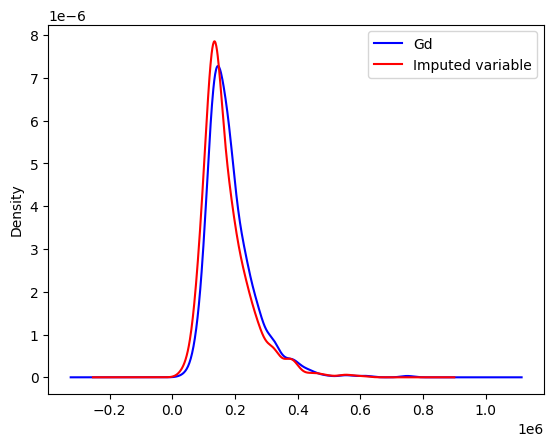

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde' , ax=ax , color='blue' , label='Gd')
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red',label='Imputed variable')
plt.legend()
plt.show()

In [55]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,Gd,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [56]:
X_train , X_test , y_train , y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)


In [57]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')


In [58]:
X_train_trf = imputer.fit_transform(X_train)
X_test_trf = imputer.transform(X_train)

In [ ]:
imputer.statistics_ 

(array(['Gd', 'TA'], dtype=object), sklearn.impute._base.SimpleImputer)